In [58]:
#import libraries
import pandas as pd
import numpy as np
import openpyxl as op
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#import csv titles files, add 'streaming_service' column and assign dedicated streaming service for each row
df_amazon = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/titles_csv/amazon_titles.csv')
df_amazon['streaming_service']= 'Amazon Prime'

df_disney = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/titles_csv/disney_titles.csv')
df_disney['streaming_service']= 'Disney+'

df_hbo = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/titles_csv/hbo_titles.csv')
df_hbo['streaming_service']= 'HBO Max'

df_hulu = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/titles_csv/hulu_titles.csv')
df_hulu['streaming_service']= 'Hulu'

df_netflix = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/titles_csv/netflix_titles.csv')
df_netflix['streaming_service']= 'Netflix'

df_paramount = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/titles_csv/paramount_titles.csv')
df_paramount['streaming_service']= 'Paramount+'

#merge all csv titles files into one dataframe (df_titles)
frames = [df_amazon, df_disney, df_hbo, df_hulu, df_netflix, df_paramount]
df_titles = pd.concat(frames)

#output first 5 rows to check data for necessary cleaning and validation
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon Prime
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon Prime
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon Prime
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,Amazon Prime
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,Amazon Prime


In [60]:
#replace all 'NaN' values (Not a Number) with 'NR' (Not Rated) in age_certification column
df_titles['age_certification'] = df_titles['age_certification'].replace(np.nan, 'NR')

#replace 'SHOW' with 'Series' and 'MOVIE' with 'Movies' in type column
df_titles['type'] = df_titles['type'].replace('SHOW', 'Series')
df_titles['type'] = df_titles['type'].replace('MOVIE', 'Movies')

#remove apostrophes and square brackets from genres and productions_countries columns
df_titles['genres'] = df_titles['genres'].str.replace('\'', '')
df_titles['production_countries'] = df_titles['production_countries'].str.replace('\'', '')

df_titles['genres'] = df_titles['genres'].str.replace(']', '', regex=True)
df_titles['genres'] = df_titles['genres'].str.replace('[', '', regex=True)
df_titles['production_countries'] = df_titles['production_countries'].str.replace('[', '', regex=True)
df_titles['production_countries'] = df_titles['production_countries'].str.replace(']', '', regex=True)

df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,streaming_service
0,ts20945,The Three Stooges,Series,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon Prime
1,tm19248,The General,Movies,"During America’s Civil War, Union spies steal ...",1926,NR,78,"action, drama, war, western, comedy, european",US,NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon Prime
2,tm82253,The Best Years of Our Lives,Movies,It's the hope that sustains the spirit of ever...,1946,NR,171,"romance, war, drama",US,NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon Prime
3,tm83884,His Girl Friday,Movies,"Hildy, the journalist former wife of newspaper...",1940,NR,92,"comedy, drama, romance",US,NaN,tt0032599,7.8,57835.0,11.270,7.4,Amazon Prime
4,tm56584,In a Lonely Place,Movies,An aspiring actress begins to suspect that her...,1950,NR,94,"thriller, drama, romance",US,NaN,tt0042593,7.9,30924.0,8.273,7.6,Amazon Prime


In [61]:
#output distinct production countries from production_countries column
production_countries = {
    x for x in ' '.join(
        df_titles.production_countries.str.lower().tolist()
    ).split() if x.isalpha()
} 

print(production_countries)

{'ci', 'fj', 'bw', 'jp', 'ie', 'tw', 'no', 'aq', 'gt', 'il', 'kr', 'ph', 'kn', 'us', 'by', 'ch', 'co', 'bg', 'kh', 'es', 've', 'yu', 'cl', 'cm', 'kg', 'xk', 'be', 'america', 'ge', 'lebanon', 'nz', 'pl', 'pk', 'hk', 'pe', 'in', 'mn', 'cu', 'gr', 'cy', 'ae', 'pa', 'kz', 'mk', 'lb', 'py', 'af', 'li', 'tn', 'sg', 'bd', 'lv', 'do', 'fr', 'ps', 'cz', 'united', 'mu', 'is', 'gh', 'zm', 'ke', 'tr', 'io', 'sa', 'tt', 'na', 'fi', 'ar', 'bo', 'ao', 'cr', 'lt', 'su', 'ru', 'dk', 'my', 'zw', 'xx', 'uy', 'it', 'rs', 'ma', 'dz', 'ki', 'gq', 'id', 'ir', 'lu', 'cn', 'at', 'tc', 'gb', 'states', 'pr', 'ua', 'au', 'fo', 'mt', 'hr', 'nl', 'bm', 'ro', 'th', 'jo', 'ee', 'mc', 'ca', 'tz', 'sk', 'al', 'lk', 'sy', 'se', 'qa', 'vn', 'sn', 'pt', 'de', 'jm', 'of', 'am', 'suhh', 'bf', 'za', 'eg', 'br', 'xc', 'kw', 'cd', 'mx', 'hu', 'ly', 'ng'}


In [62]:
#replace 'Lebanon' with 'lb', 'suhh' with 'ru' and 'United States of America' with 'us' to keep the countries consistent with two-letter country codes format 
df_titles['production_countries'] = df_titles['production_countries'].replace('Lebanon', 'lb')
df_titles['production_countries'] = df_titles['production_countries'].replace('United States of America', 'us')
df_titles['production_countries'] = df_titles['production_countries'].replace('United', 'us')

#limit the number of production countries to 1 per movie or series to avoid ambiguity and rename 'production_countries' column to 'production_country'
max_size = 1
df_titles['production_countries'] = df_titles['production_countries'].str.split(n=max_size).str[:max_size].str.join(' ')
df_titles['production_countries'] = df_titles['production_countries'].str.replace(',', '')
df_titles.rename(columns={'production_countries':'production_country'}, inplace=True)

In [63]:
#output distinct genres from df_titles for additional columns ie. genres flag
genres = {
    x for x in ' '.join(
        df_titles.genres.str.lower().tolist()
    ).split() if x.isalpha()
} 

print(genres)

{'war', 'documentation', 'thriller', 'scifi', 'action', 'romance', 'music', 'sport', 'european', 'history', 'fantasy', 'reality', 'drama', 'animation', 'western', 'comedy', 'crime', 'family', 'horror'}


In [64]:
#limit the number of genres to 4 per movie or series to avoid ambiguity
max_size = 4
df_titles['genres'] = df_titles['genres'].str.split(n=max_size).str[:max_size].str.join(' ')

#add additional columns ie. genres flag that defines distinct genres for movies and series
df_titles.loc[df_titles['genres'].str.contains('drama'), 'flag_drama'] = 1
df_titles.loc[df_titles['genres'].str.contains('fantasy'), 'flag_fantasy'] = 1
df_titles.loc[df_titles['genres'].str.contains('western'), 'flag_western'] = 1
df_titles.loc[df_titles['genres'].str.contains('comedy'), 'flag_comedy'] = 1
df_titles.loc[df_titles['genres'].str.contains('family'), 'flag_family'] = 1
df_titles.loc[df_titles['genres'].str.contains('romance'), 'flag_romance'] = 1
df_titles.loc[df_titles['genres'].str.contains('action'), 'flag_action'] = 1
df_titles.loc[df_titles['genres'].str.contains('thriller'), 'flag_thriller'] = 1
df_titles.loc[df_titles['genres'].str.contains('horror'), 'flag_horror'] = 1
df_titles.loc[df_titles['genres'].str.contains('war'), 'flag_war'] = 1
df_titles.loc[df_titles['genres'].str.contains('sport'), 'flag_sport'] = 1
df_titles.loc[df_titles['genres'].str.contains('history'), 'flag_history'] = 1
df_titles.loc[df_titles['genres'].str.contains('reality'), 'flag_reality'] = 1
df_titles.loc[df_titles['genres'].str.contains('animation'), 'flag_animation'] = 1
df_titles.loc[df_titles['genres'].str.contains('documentation'), 'flag_documentation'] = 1
df_titles.loc[df_titles['genres'].str.contains('crime'), 'flag_crime'] = 1
df_titles.loc[df_titles['genres'].str.contains('scifi'), 'flag_scifi'] = 1
df_titles.loc[df_titles['genres'].str.contains('music'), 'flag_music'] = 1
df_titles.loc[df_titles['genres'].str.contains('european'), 'flag_european'] = 1

#replace blank values in genre flag columns with 0
genre_columns = ['flag_documentation', 'flag_animation', 'flag_fantasy', 'flag_horror', 'flag_family', 'flag_romance', 'flag_sport', 'flag_war', 'flag_scifi', 
'flag_music', 'flag_reality', 'flag_thriller', 'flag_action', 'flag_history', 'flag_european', 'flag_crime', 'flag_drama', 'flag_western', 'flag_comedy']
df_titles[genre_columns] = df_titles[genre_columns].replace(np.nan, 0)

In [65]:
#output first 5 rows to check changes from data cleaning and validation before EDA and exporting to an excel file
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_country,seasons,...,flag_war,flag_sport,flag_history,flag_reality,flag_animation,flag_documentation,flag_crime,flag_scifi,flag_music,flag_european
0,ts20945,The Three Stooges,Series,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action,",US,26.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,tm19248,The General,Movies,"During America’s Civil War, Union spies steal ...",1926,NR,78,"action, drama, war, western,",US,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm82253,The Best Years of Our Lives,Movies,It's the hope that sustains the spirit of ever...,1946,NR,171,"romance, war, drama",US,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tm83884,His Girl Friday,Movies,"Hildy, the journalist former wife of newspaper...",1940,NR,92,"comedy, drama, romance",US,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tm56584,In a Lonely Place,Movies,An aspiring actress begins to suspect that her...,1950,NR,94,"thriller, drama, romance",US,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


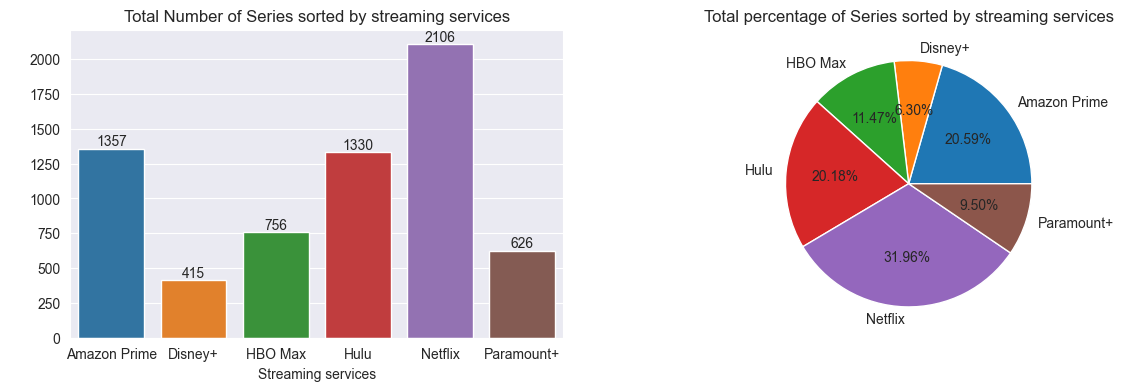

In [66]:
#query df_titles to only output series data
df_series = df_titles[df_titles.type == 'Series']

#create a table that groups series by streaming service
series_table = df_series.groupby('streaming_service').size().reset_index().rename(columns = {0:'Series'})

#create bar and pie chart that shows the number and percentage of series by streaming service
fig, axes = plt.subplots(1,2, figsize=(14,4))
barplot = sns.barplot(x = series_table.streaming_service, y = series_table.Series, ax=axes[0])
barplot.bar_label(barplot.containers[0])
barplot.set(xlabel='Streaming services', ylabel=" ", title='Total Number of Series sorted by streaming services')
sns.set_style("darkgrid")
plt.pie(df_series.groupby(['streaming_service'])['streaming_service'].count(), labels=df_series['streaming_service'].unique(), autopct='%1.2f%%')
plt.title('Total percentage of Series sorted by streaming services')
plt.show()

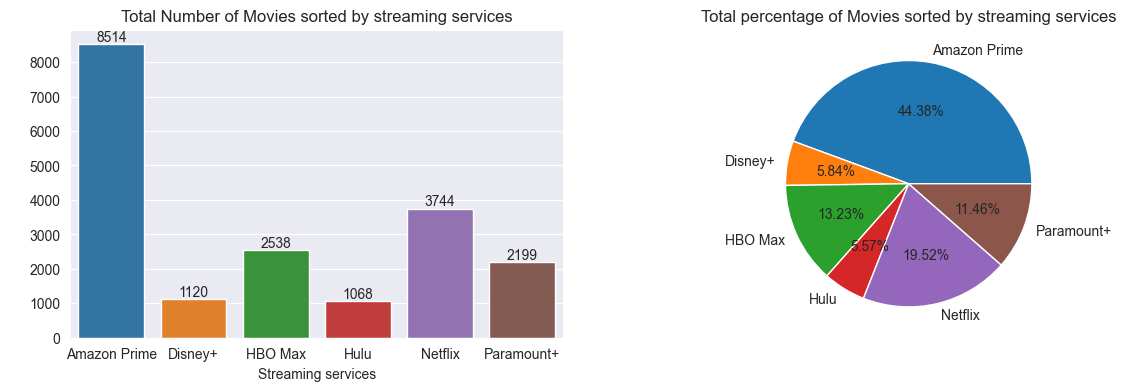

In [67]:
#query df_titles to only output movies data
df_movies = df_titles[df_titles.type == 'Movies']

#create a table that groups movies by streaming service
movies_table = df_movies.groupby('streaming_service').size().reset_index().rename(columns = {0:'Movies'})

#create bar and pie chart that shows the number and percentage of movies by streaming service
fig, axes = plt.subplots(1,2, figsize=(14,4))
barplot = sns.barplot(x = movies_table.streaming_service, y = movies_table.Movies, ax=axes[0])
barplot.bar_label(barplot.containers[0])
barplot.set(xlabel='Streaming services', ylabel=" ", title='Total Number of Movies sorted by streaming services')
plt.pie(df_movies.groupby(['streaming_service'])['streaming_service'].count(), labels=df_movies['streaming_service'].unique(), autopct='%1.2f%%')
plt.title('Total percentage of Movies sorted by streaming services')
plt.show()

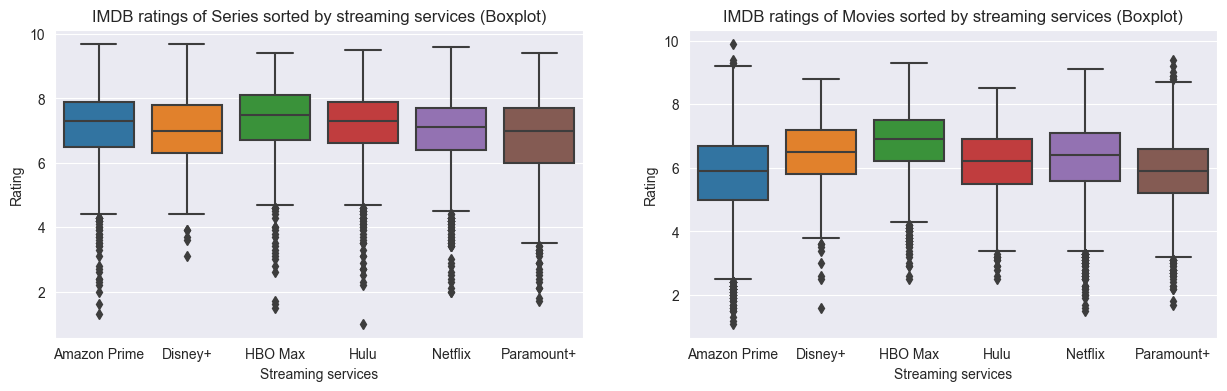

In [68]:
#create boxplot graphs that shows IMDB ratings of series and movies sorted by streaming services
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
boxplot1 = sns.boxplot(data=df_series, x='streaming_service', y='imdb_score', ax=axes[0])
boxplot1.set(xlabel='Streaming services', ylabel="Rating", title='IMDB ratings of Series sorted by streaming services (Boxplot)')
boxplot2 = sns.boxplot(data=df_movies, x='streaming_service', y='imdb_score', ax=axes[1])
boxplot2.set(xlabel='Streaming services', ylabel="Rating", title='IMDB ratings of Movies sorted by streaming services (Boxplot)')
plt.show()

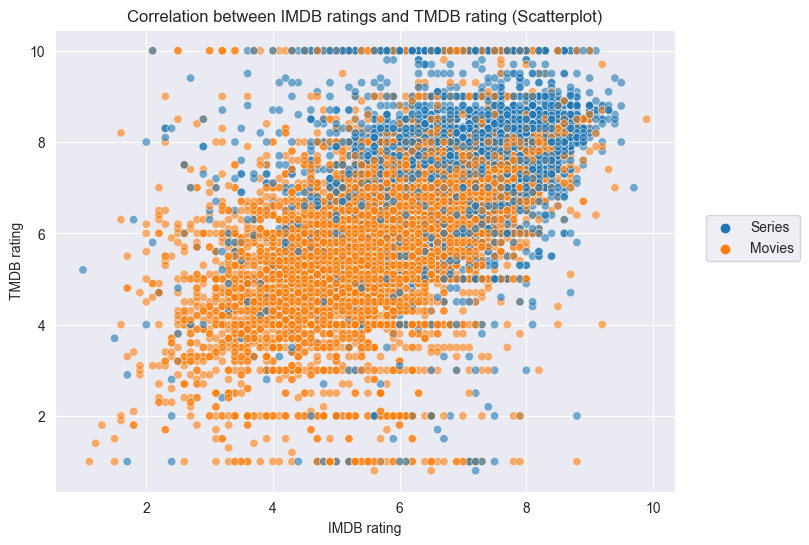

In [69]:
#create scatterplot that shows correlation between IMDB ratings and TMDB rating
plt.figure(figsize=(8,6),dpi=100)
scatterplot = sns.scatterplot(data=df_titles,x='imdb_score',y='tmdb_score',hue='type',alpha=0.6)
scatterplot.set(xlabel='IMDB rating', ylabel="TMDB rating", title='Correlation between IMDB ratings and TMDB rating (Scatterplot)')
sns.set_style("darkgrid")
plt.legend(loc=(1.05,0.5))
plt.show()

In [70]:
#create a table that shows the representivness of series genres for each streaming service
series_genres = df_series.groupby(['streaming_service']).agg({'flag_drama' : ['mean'], 'flag_fantasy': ['mean'], 'flag_western' : ['mean'], 'flag_comedy': ['mean'],
'flag_family' : ['mean'], 'flag_romance': ['mean'], 'flag_action' : ['mean'], 'flag_thriller': ['mean'], 'flag_horror' : ['mean'], 'flag_war': ['mean'],
'flag_sport' : ['mean'], 'flag_history': ['mean'],'flag_reality' : ['mean'], 'flag_animation': ['mean'],'flag_documentation' : ['mean'], 'flag_crime': ['mean'],
'flag_scifi' : ['mean'], 'flag_music': ['mean'],'flag_european' : ['mean']})
series_genres.columns = ['drama', 'fantasy', 'western', 'comedy', 'family', 'romance', 'action', 'thriller', 'horror', 'war',
'sport', 'history', 'reality', 'animation', 'documentation', 'crime', 'scifi', 'music', 'european']
series_genres = series_genres.reset_index()
series_genres

,streaming_service,drama,fantasy,western,comedy,family,romance,action,thriller,horror,war,sport,history,reality,animation,documentation,crime,scifi,music,european
0,Amazon Prime,0.387620,0.075166,0.011054,0.305822,0.153279,0.087693,0.131909,0.089167,0.027266,0.028740,0.032424,0.056006,0.100221,0.198968,0.175387,0.110538,0.122329,0.019897,0.063375
1,Disney+,0.175904,0.156627,0.014458,0.380723,0.440964,0.038554,0.250602,0.038554,0.004819,0.002410,0.014458,0.021687,0.142169,0.293976,0.281928,0.033735,0.248193,0.050602,0.004819
2,HBO Max,0.388889,0.107143,0.003968,0.427249,0.123016,0.083333,0.171958,0.128307,0.038360,0.019841,0.030423,0.034392,0.095238,0.191799,0.170635,0.165344,0.169312,0.022487,0.041005
3,Hulu,0.421805,0.132331,0.003008,0.394737,0.098496,0.145113,0.227068,0.127068,0.037594,0.025564,0.021805,0.027068,0.152632,0.241353,0.099248,0.138346,0.242105,0.031579,0.032331
4,Netflix,0.489079,0.100665,0.004274,0.335233,0.139601,0.110636,0.189934,0.169991,0.037037,0.025641,0.025641,0.048433,0.106363,0.188984,0.159069,0.177113,0.167142,0.026591,0.033238
5,Paramount+,0.209265,0.083067,0.007987,0.388179,0.238019,0.052716,0.123003,0.078275,0.015974,0.015974,0.014377,0.057508,0.166134,0.169329,0.261981,0.087859,0.108626,0.030351,0.017572


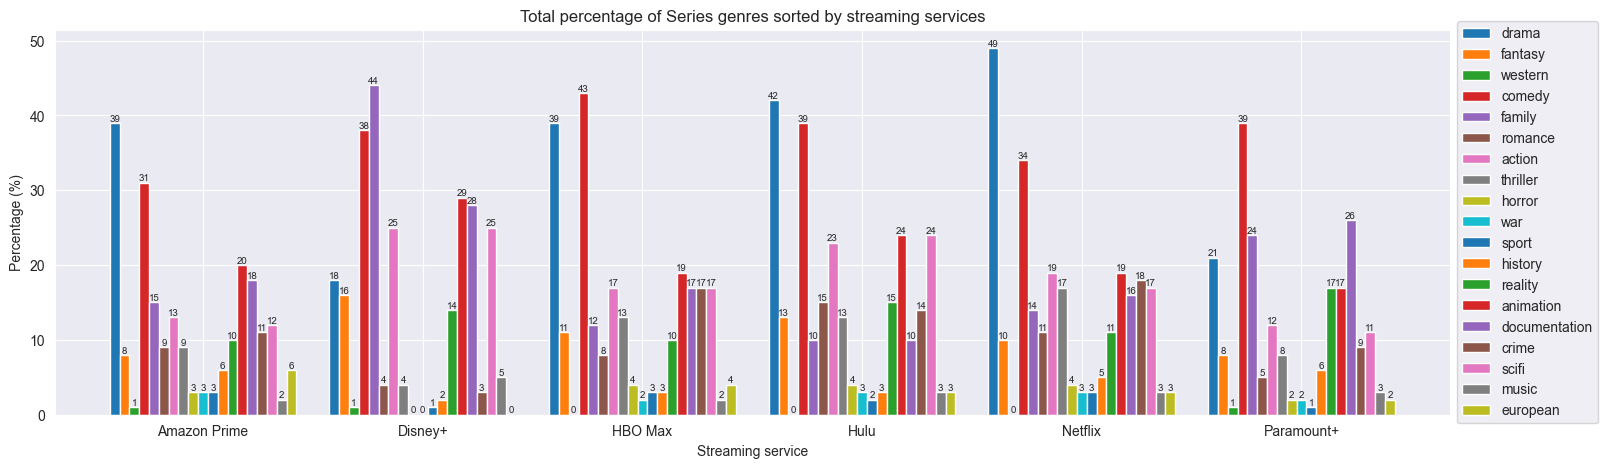

In [71]:
#multiply values from 'show_genres' by 100 and round up to 0 decimals
series_genres.iloc[:,1:] = series_genres.iloc[:,1:].mul(100)
series_genres = np.round(series_genres, decimals=0)

#plot a grouped bar chart that shows the total percentage of series genres for each streaming service
ax = series_genres.plot(x='streaming_service', kind='bar', figsize=(18,5), rot=0, title='Total percentage of Series genres sorted by streaming services', xlabel='Streaming service', ylabel='Percentage (%)', width=0.85)
for c in ax.containers:
        ax.bar_label(c, label_type='edge', size=7)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [72]:
#create a table that shows the representivness of movie genres for each streaming streaming service
movie_genres = df_movies.groupby(['streaming_service']).agg({'flag_drama' : ['mean'], 'flag_fantasy': ['mean'], 'flag_western' : ['mean'], 'flag_comedy': ['mean'],
'flag_family' : ['mean'], 'flag_romance': ['mean'], 'flag_action' : ['mean'], 'flag_thriller': ['mean'], 'flag_horror' : ['mean'], 'flag_war': ['mean'],
'flag_sport' : ['mean'], 'flag_history': ['mean'],'flag_reality' : ['mean'], 'flag_animation': ['mean'],'flag_documentation' : ['mean'], 'flag_crime': ['mean'],
'flag_scifi' : ['mean'], 'flag_music': ['mean'],'flag_european' : ['mean']})
movie_genres.columns = ['drama', 'fantasy', 'western', 'comedy', 'family', 'romance', 'action', 'thriller', 'horror', 'war',
'sport', 'history', 'reality', 'animation', 'documentation', 'crime', 'scifi', 'music', 'european']
movie_genres = movie_genres.reset_index()
movie_genres

,streaming_service,drama,fantasy,western,comedy,family,romance,action,thriller,horror,war,sport,history,reality,animation,documentation,crime,scifi,music,european
0,Amazon Prime,0.493305,0.046981,0.055203,0.294926,0.061193,0.185812,0.184989,0.229387,0.117101,0.031478,0.020319,0.036528,0.000117,0.020672,0.100305,0.126145,0.059197,0.046394,0.060606
1,Disney+,0.208929,0.247321,0.013393,0.403571,0.447321,0.094643,0.154464,0.025000,0.017857,0.003571,0.041071,0.028571,0.001786,0.277679,0.208036,0.025000,0.119643,0.057143,0.015179
2,HBO Max,0.434594,0.114263,0.019307,0.300236,0.078408,0.167061,0.165091,0.191489,0.067770,0.037037,0.037037,0.060284,0.000788,0.061466,0.228920,0.153270,0.097715,0.048463,0.100867
3,Hulu,0.483146,0.101124,0.012172,0.338015,0.090824,0.178839,0.146067,0.267790,0.157303,0.022472,0.030899,0.056180,0.000936,0.057116,0.191011,0.115169,0.086142,0.054307,0.100187
4,Netflix,0.489850,0.073184,0.006410,0.413194,0.089209,0.180556,0.182692,0.211004,0.066239,0.025641,0.029380,0.036592,0.002404,0.071047,0.162660,0.140759,0.047009,0.049947,0.071047
5,Paramount+,0.415643,0.048204,0.101864,0.331969,0.051387,0.198272,0.193270,0.201910,0.108231,0.043201,0.015916,0.039563,0.000455,0.022738,0.150523,0.133697,0.074125,0.053206,0.031833


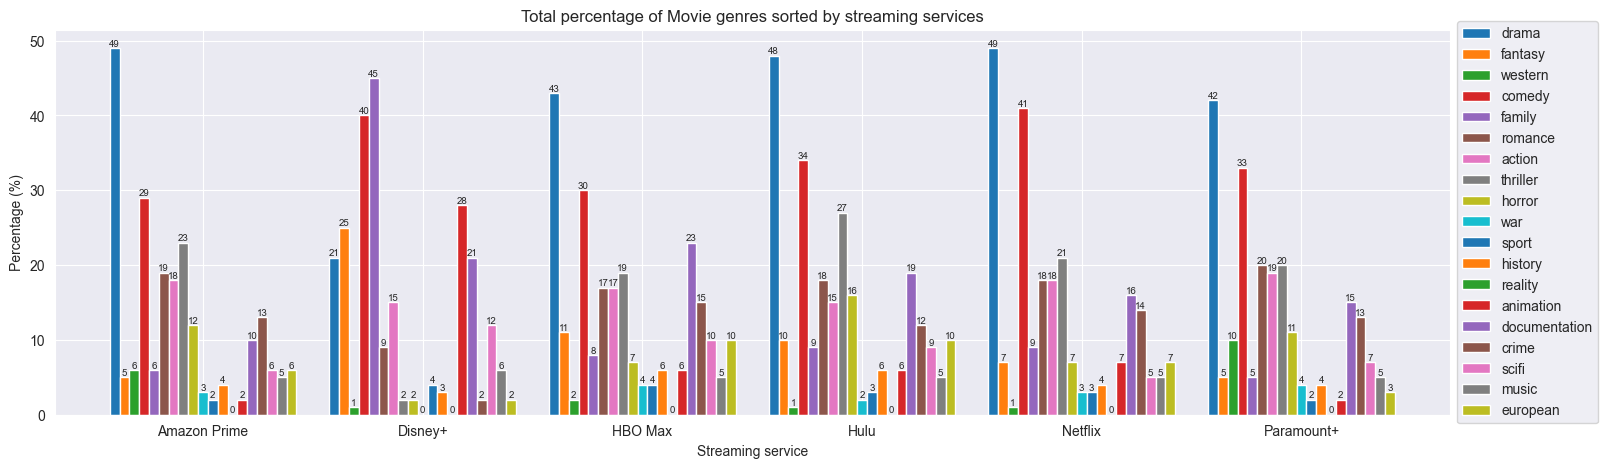

In [73]:
#multiply values from 'movie_genres' by 100 and round up to 0 decimals
movie_genres.iloc[:,1:] = movie_genres.iloc[:,1:].mul(100)
movie_genres = np.round(movie_genres, decimals=0)

#plot a grouped bar chart that shows the total percentage of movie genres for each streaming service
ax = movie_genres.plot(x='streaming_service', kind='bar', figsize=(18,5), rot=0, title='Total percentage of Movie genres sorted by streaming services', xlabel='Streaming service', ylabel='Percentage (%)', width=0.85)
for c in ax.containers:
        ax.bar_label(c, label_type='edge', size=7)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [74]:
#import csv credits files, add 'streaming_service' column and assign dedicated streaming service for each row
df_amazon = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/credits_csv/amazon_credits.csv')

df_disney = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/credits_csv/disney_credits.csv')

df_hbo = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/credits_csv/hbo_credits.csv')

df_hulu = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/credits_csv/hulu_credits.csv')

df_netflix = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/credits_csv/netflix_credits.csv')

df_paramount = pd.read_csv('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/credits_csv/paramount_credits.csv')

#merge all csv credits files into one dataframe (df_credits)
frames = [df_amazon, df_disney, df_hbo, df_hulu, df_netflix, df_paramount]
df_credits = pd.concat(frames)

#capitalize only first letter in column 'role'
df_credits.role = df_credits.role.str.capitalize()

#remove all leading and trailing whitespace from column 'name'
df_credits.name = df_credits.name.str.strip()

#check dataframe for blank values
df_credits[df_credits['role'].isnull()]

,person_id,id,name,character,role


In [75]:
#full outer join df_titles with df_credits on 'id' into one dataframe (df_final)
df_final = pd.merge(df_titles, df_credits, on='id', how='outer')

#output first 5 rows of df_final
df_final.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_country,seasons,...,flag_animation,flag_documentation,flag_crime,flag_scifi,flag_music,flag_european,person_id,name,character,role
0,ts20945,The Three Stooges,Series,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action,",US,26.0,...,1.0,0.0,0.0,0.0,0.0,0.0,59401.0,Joe Besser,Joe,Actor
1,ts20945,The Three Stooges,Series,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action,",US,26.0,...,1.0,0.0,0.0,0.0,0.0,0.0,31460.0,Moe Howard,Moe,Actor
2,ts20945,The Three Stooges,Series,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"comedy, family, animation, action,",US,26.0,...,1.0,0.0,0.0,0.0,0.0,0.0,31461.0,Larry Fine,Larry,Actor
3,tm19248,The General,Movies,"During America’s Civil War, Union spies steal ...",1926,NR,78,"action, drama, war, western,",US,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,21174.0,Buster Keaton,Johnny Gray,Actor
4,tm19248,The General,Movies,"During America’s Civil War, Union spies steal ...",1926,NR,78,"action, drama, war, western,",US,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,28713.0,Marion Mack,Annabelle Lee,Actor


In [76]:
#export all merged dataframes (df_final) to excel

df_final.to_excel('C:/Users/dinoz/Desktop/My Folder/Data Analytics/Streaming services project/Streaming_services_final_database.xlsx')